In [1]:
import warnings

import pandas as pd
import numpy as np

from functions.loading import load_data

from functions.merged_dataset_creation import create_preprocessed_dataset
from functions.training_pipeline import training_pipeline
from functions.models import xgboost_model, catboost_model, lgbm_model

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None


## Parameters defintion

In [2]:
path_rawdata = 'data/raw_data/'
path_models = 'models/proprietary_data/'
path_Benchmark = 'Benchmark/'
path_results = 'results/proprietary_data/'
path_plot = path_results +'plot/'
path_intermediary = 'data/intermediary_data/proprietary_data/'
path_plot = 'results/proprietary_data/plot/'
# ,"CF3_log", "CF123_log"
targets = ["CF1_log","CF2_log","CF3_log", "CF123_log"]
models = {
        "xgboost": xgboost_model,
        "catboost": catboost_model,
        "lgbm": lgbm_model,
}
training_parameters = {
    "low":0.01,
    "high":1,
    "extended_features": [
            "Revenue_log",
            "EMP_log",
            "Asset_log",
            "NPPE_log",
            "CapEx_log",
            "Age",
            "CapInten",
            "GMAR",
            "Leverage",
            "Price",
            "FuelIntensity",
            "FiscalYear",
            "ENEConsume_log",
            "ENEProduce_log",
            "INTAN_log",
            "AccuDep_log",
            "COGS_log",
        ],
    "selec_sect":["GICSSubInd", "GICSInd", "GICSGroup"],
    "fill_grp":"",
    "old_pipe":False,  
    "cross_val": False,
}

Summary_Final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

## Train and save best models for proprietary data

In [3]:
Refinitiv_cdp_merged = pd.read_csv(path_rawdata+"Refinitiv_cdp_merged.csv")
Refinitiv_cdp_merged['CF1'].fillna(Refinitiv_cdp_merged['CDP_CF1'], inplace=True)
Refinitiv_cdp_merged['CF2'].fillna(Refinitiv_cdp_merged['CDP_CF2_location'], inplace=True)
Refinitiv_cdp_merged['CF3'].fillna(Refinitiv_cdp_merged['CDP_CF3'], inplace=True)

In [4]:
Refinitiv_data, CarbonPricing, IncomeGroup, FuelIntensity, GICSReclass = load_data(path_rawdata) 
        
preprocessed_dataset = create_preprocessed_dataset(
    Refinitiv_data,
    GICSReclass,
    CarbonPricing,
    IncomeGroup,
    FuelIntensity) 

2023/07/17 16:40:15 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/07/17 16:40:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 63
Created version '63' of model 'xgboost'.
2023/07/17 16:40:36 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/07/17 16:40:41 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 63
Created version '63' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002683 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/07/17 16:40:42 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/07/17 16:40:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 62
Created version '62' of model 'lgbm'.


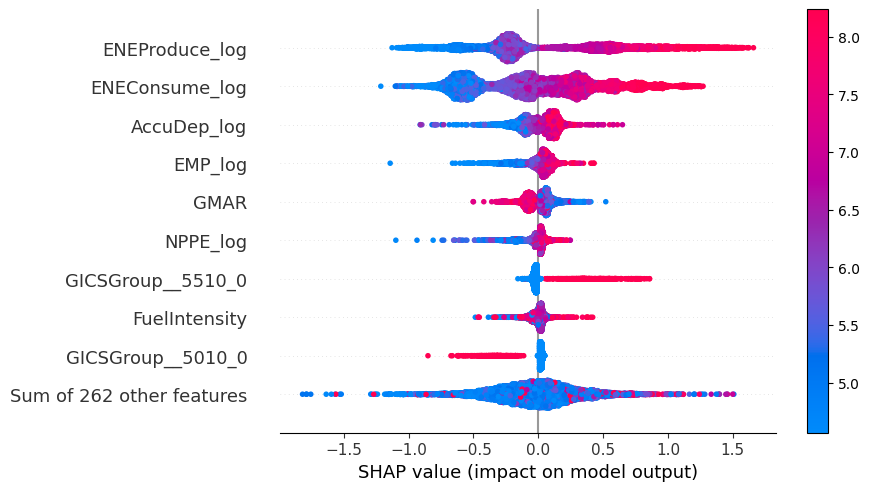

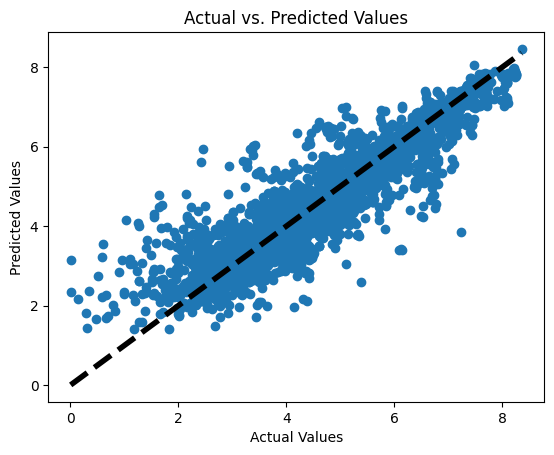

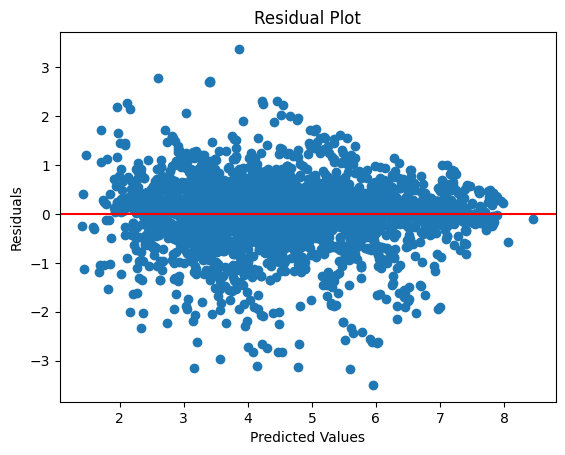

2023/07/17 16:43:53 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/07/17 16:44:02 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 64
Created version '64' of model 'xgboost'.
2023/07/17 16:44:13 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/07/17 16:44:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 64
Created version '64' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002610 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/07/17 16:44:20 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/07/17 16:44:25 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 63
Created version '63' of model 'lgbm'.


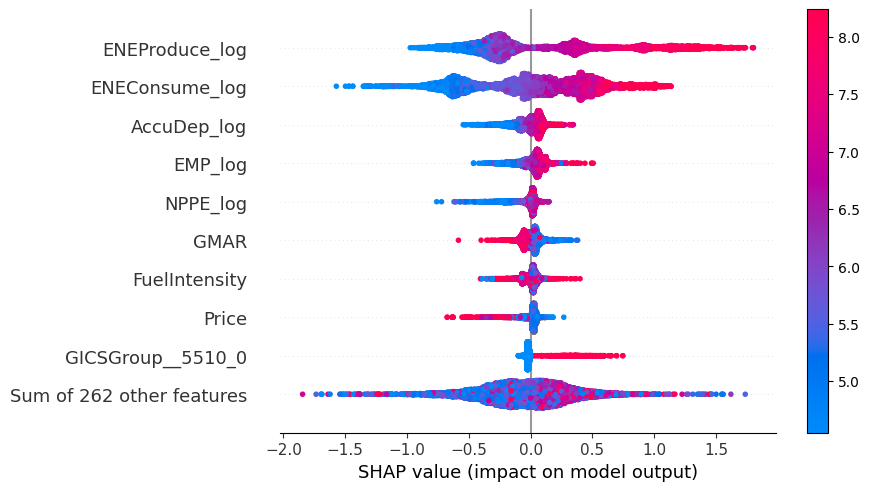

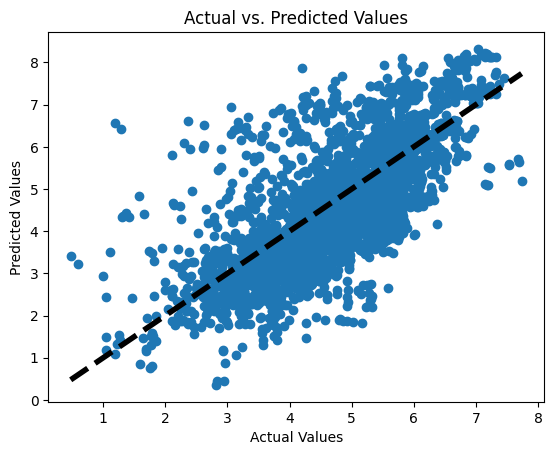

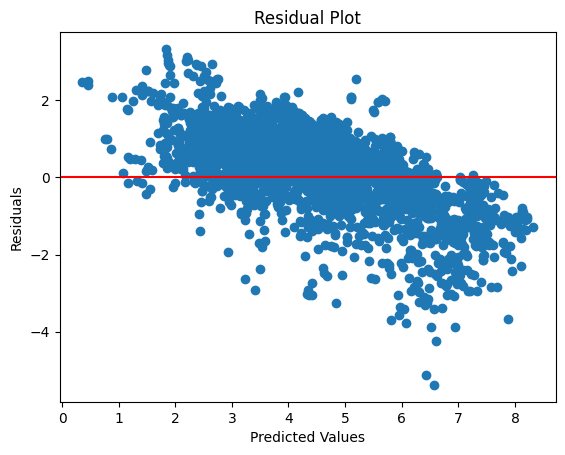

2023/07/17 16:46:46 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/07/17 16:46:51 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 65
Created version '65' of model 'xgboost'.
2023/07/17 16:46:59 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/07/17 16:47:04 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 65
Created version '65' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003666 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/07/17 16:47:05 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/07/17 16:47:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 64
Created version '64' of model 'lgbm'.


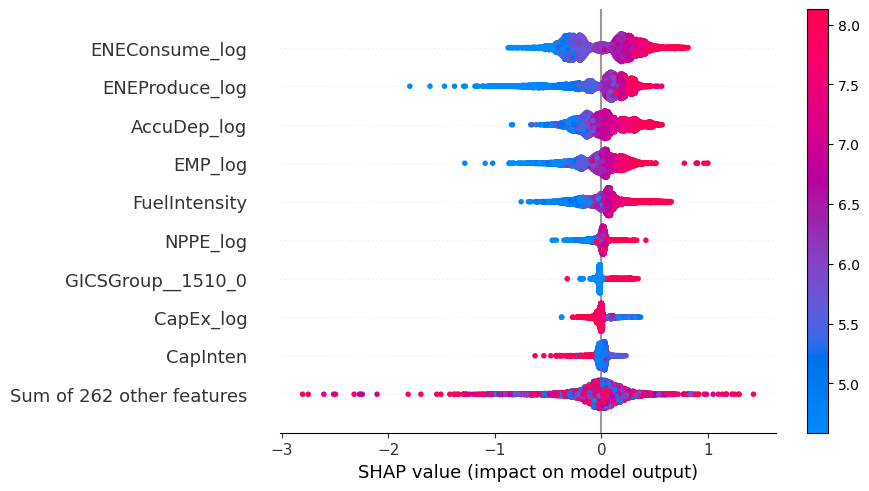

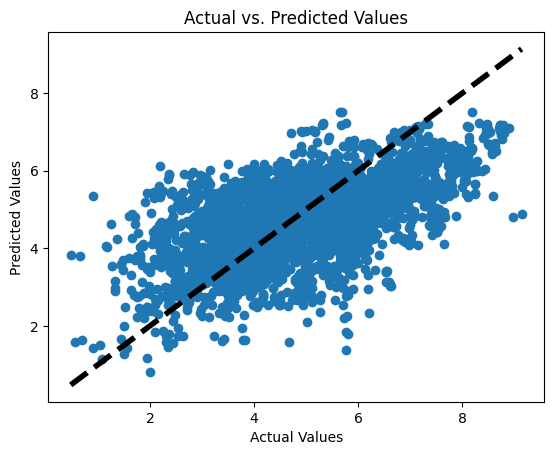

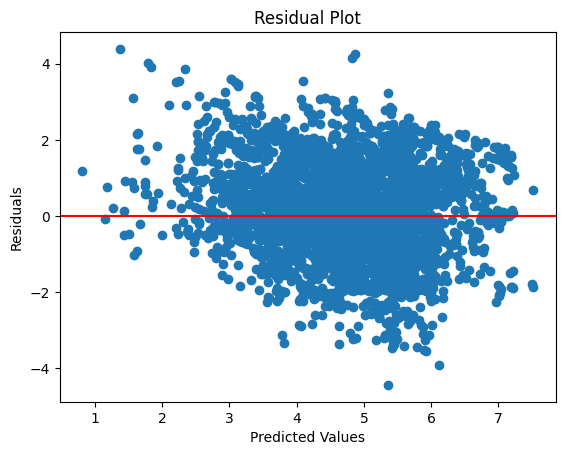

2023/07/17 16:49:41 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/07/17 16:49:48 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 66
Created version '66' of model 'xgboost'.
2023/07/17 16:49:57 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/07/17 16:50:02 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 66
Created version '66' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001792 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/07/17 16:50:03 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/07/17 16:50:08 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 65
Created version '65' of model 'lgbm'.


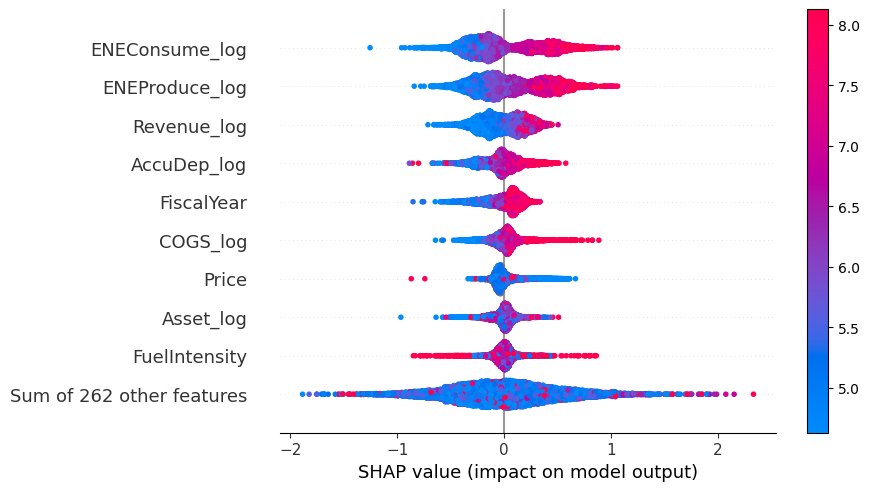

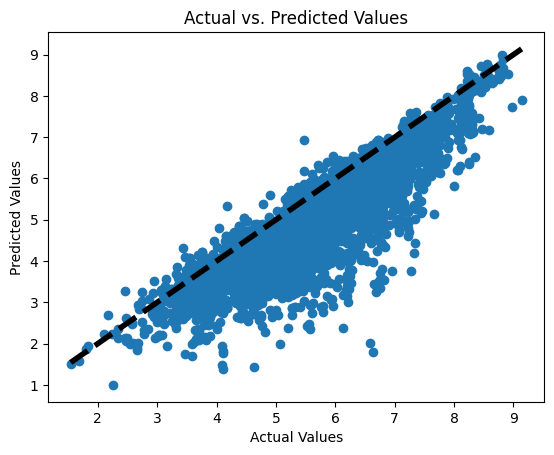

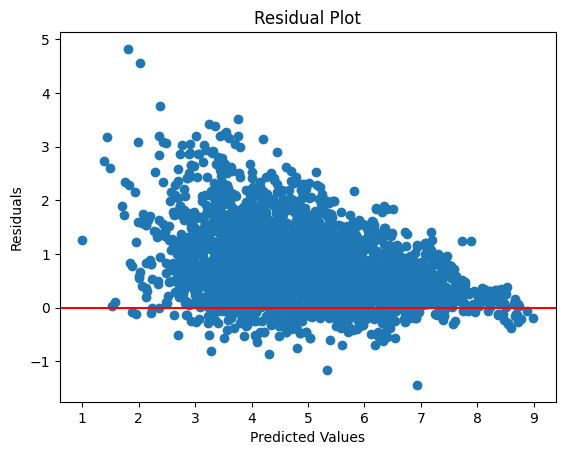

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
best_scores, best_stds, summary_global, summary_global_train, summary_metrics_detailed,df_test,df_train, df_test_before_imputation,df_train_before_imputation = training_pipeline(
    name_experiment="best_models_on_proprietary_same_data",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    Summary_Final_train =Summary_Final_train,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    open_data=False,
    save=True,
    
)

In [6]:
summary_global.to_csv("summary_perf_merge_test_same_bdd.csv")
summary_global_train.to_csv("summary_perf_merge_train_same_bdd.csv")
